**Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the dataset .csv**

In [2]:
DBset_path='diabetes.csv'
DiabetesDBset=pd.read_csv(DBset_path)

**Number of rows and columns**

In [3]:
DiabetesDBset.shape


(768, 9)

**Printing the first five rows of DBset**

In [4]:
DiabetesDBset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Display the different datatypes available**

In [5]:
DiabetesDBset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Checking if any null value is present**

In [6]:
DiabetesDBset.isnull().values.any()

False

Statistical measures of the data 

In [7]:
DiabetesDBset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
DiabetesDBset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

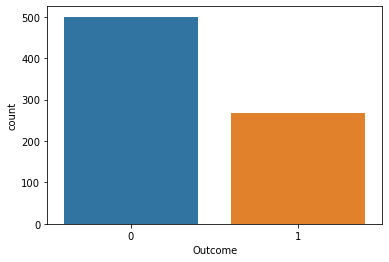

In [9]:
#number of each Outcome (diabetic-1 and non-diabetic-0)
sns.countplot(x = 'Outcome',data = DiabetesDBset)

In [10]:
DiabetesDBset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Heatmap - correlation

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<AxesSubplot:>

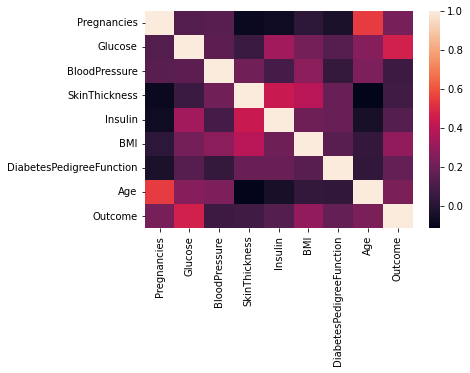

In [11]:
correlation=DiabetesDBset.corr()
print(correlation)
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns)

Histograms for each feature 

<function matplotlib.pyplot.show(close=None, block=None)>

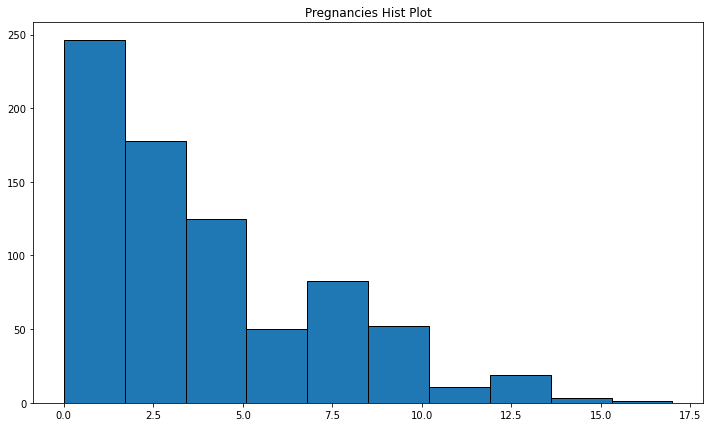

In [12]:
plt.figure(figsize=(12,7))
plt.hist("Pregnancies",data=DiabetesDBset,edgecolor="k")
plt.title("Pregnancies Hist Plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

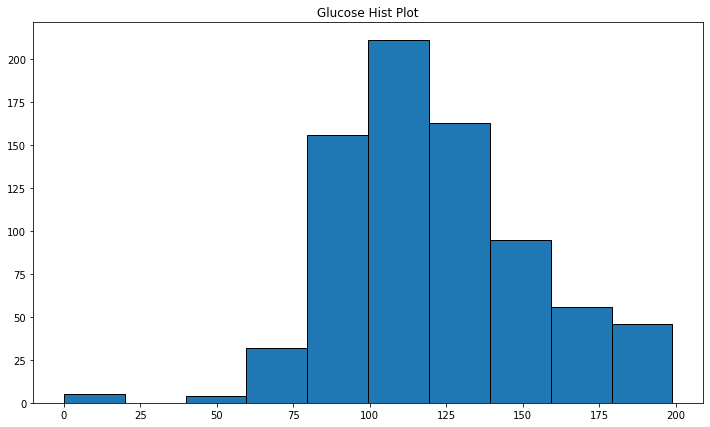

In [13]:
plt.figure(figsize=(12,7))
plt.hist("Glucose",data=DiabetesDBset,edgecolor="k")
plt.title("Glucose Hist Plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

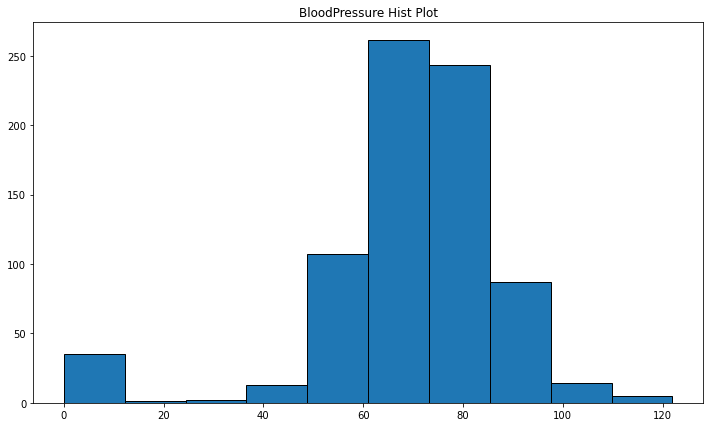

In [14]:
plt.figure(figsize=(12,7))
plt.hist("BloodPressure",data=DiabetesDBset,edgecolor="k")
plt.title("BloodPressure Hist Plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

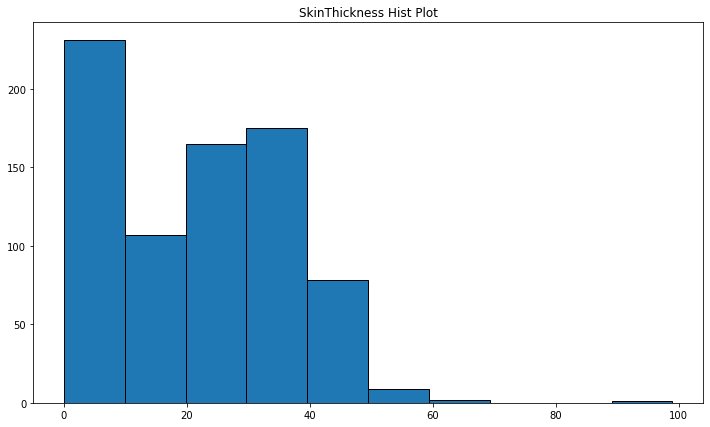

In [15]:
plt.figure(figsize=(12,7))
plt.hist("SkinThickness",data=DiabetesDBset,edgecolor="k")
plt.title("SkinThickness Hist Plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

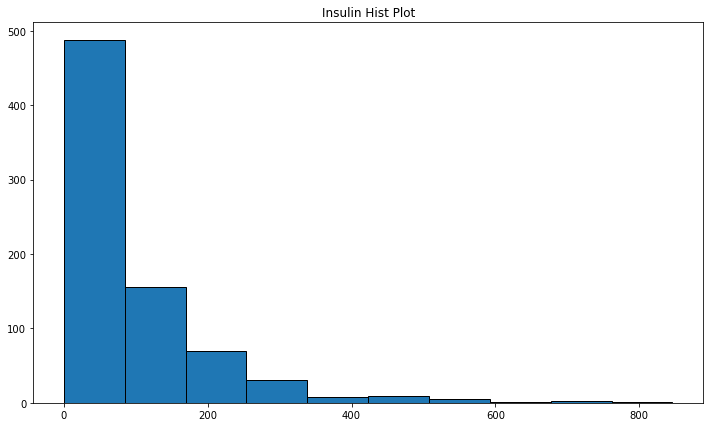

In [16]:
plt.figure(figsize=(12,7))
plt.hist("Insulin",data=DiabetesDBset,edgecolor="k")
plt.title("Insulin Hist Plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

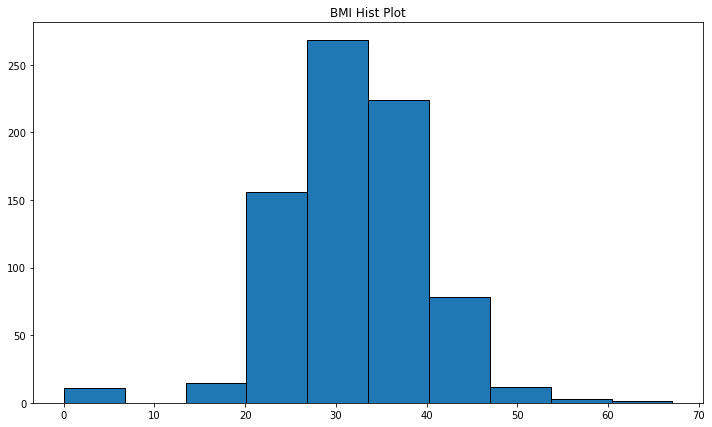

In [17]:
plt.figure(figsize=(12,7))
plt.hist("BMI",data=DiabetesDBset,edgecolor="k")
plt.title("BMI Hist Plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

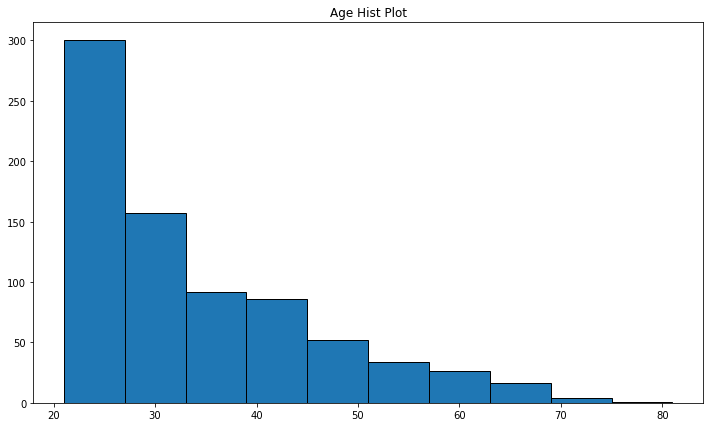

In [18]:
plt.figure(figsize=(12,7))
plt.hist("Age",data=DiabetesDBset,edgecolor="k")
plt.title("Age Hist Plot")
plt.show

Separating the data and labels

In [19]:
X=DiabetesDBset.drop(columns='Outcome',axis=1)
Y=DiabetesDBset['Outcome']

In [20]:
#Printing X and Y table

print("Data table:")
print(X)
print("Outcome table:")
print(Y)

Data table:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0

*Data* standardization

In [21]:
Scaler=StandardScaler()

In [22]:
Scaler.fit(X)


StandardScaler()

In [23]:
Standardized_data=Scaler.transform(X)

In [24]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [25]:
X=Standardized_data
Y=DiabetesDBset['Outcome']

Train test split

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

About X, X_train and X_test => number of rows and columns


In [27]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the ML model

In [28]:
classifier = svm.SVC(kernel='linear')

In [29]:
#support vectom machine classifier

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Evaluation

In [30]:
#Accuracy check - training set

X_train_prediction = classifier.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction,Y_train)
print(X_train_accuracy)

0.7866449511400652


In [31]:
#Accuracy check - testing set

X_test_prediction = classifier.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction,Y_test)
print(X_test_accuracy)

0.7727272727272727


Prediction

In [32]:
#input data instance
input_data = (6,148,72,35,0,33.6,0.627,50)

#check test
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
standardize_input_Data = Scaler.transform(input_data_reshaped)


prediction = classifier.predict(standardize_input_Data)
if(prediction==[0]):
    print("Person is non-diabetic")
else:
    print("Person is diabetic")

Person is diabetic
